<a href="https://colab.research.google.com/github/ShreyaSutar2004/Cancer_prediction_model/blob/main/ML_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


In [6]:
dataset=pd.read_csv('/content/cancer patient data sets.csv')
dataset

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

Treating empty and missing values

In [ ]:

missing_values=dataset.isnull()

for column in missing_values.columns.values:
  print(missing_values[column].value_counts())
  print("")


Patient Id
False    1000
Name: count, dtype: int64

Age
False    1000
Name: count, dtype: int64

Gender
False    1000
Name: count, dtype: int64

Air Pollution
False    1000
Name: count, dtype: int64

Alcohol use
False    1000
Name: count, dtype: int64

Dust Allergy
False    1000
Name: count, dtype: int64

OccuPational Hazards
False    1000
Name: count, dtype: int64

Genetic Risk
False    1000
Name: count, dtype: int64

chronic Lung Disease
False    1000
Name: count, dtype: int64

Balanced Diet
False    1000
Name: count, dtype: int64

Obesity
False    1000
Name: count, dtype: int64

Smoking
False    1000
Name: count, dtype: int64

Passive Smoker
False    1000
Name: count, dtype: int64

Chest Pain
False    1000
Name: count, dtype: int64

Coughing of Blood
False    1000
Name: count, dtype: int64

Fatigue
False    1000
Name: count, dtype: int64

Weight Loss
False    1000
Name: count, dtype: int64

Shortness of Breath
False    1000
Name: count, dtype: int64

Wheezing
False    1000
Name: cou

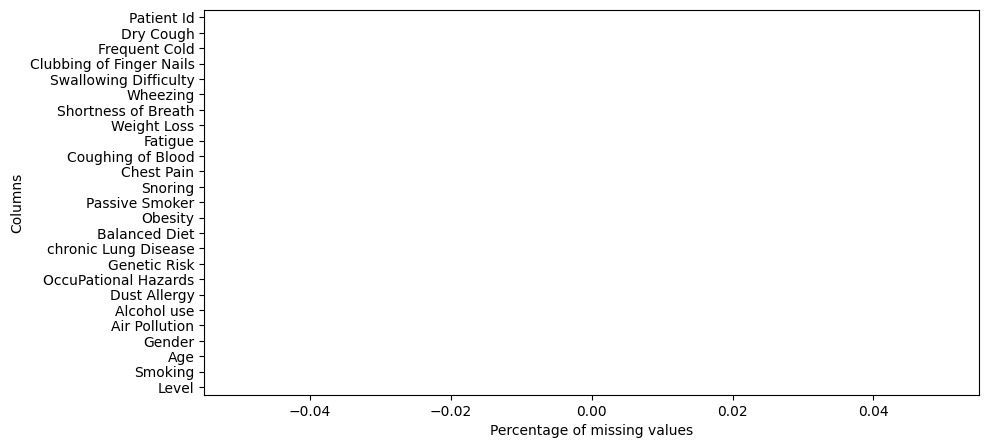

In [ ]:
missing_values=dataset.isnull().mean()*100

missing_values=pd.Series(missing_values)
missing_column=missing_values.sort_values()

# Plot the graph
plt.figure(figsize=(10,5))
sns.barplot(x=missing_column,y=missing_column.index)
plt.xlabel('Percentage of missing values')
plt.ylabel('Columns')
plt.show()

In [17]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


Outlier Treatment

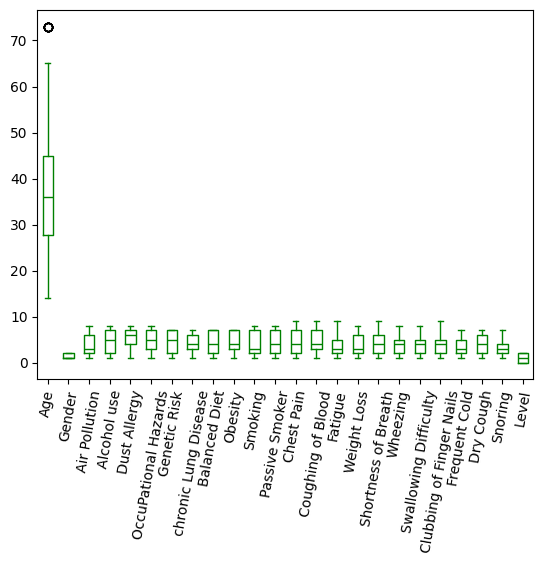

In [ ]:

dataset.plot(kind='box',rot=80,color='green')
plt.show()

Multivariate analysis

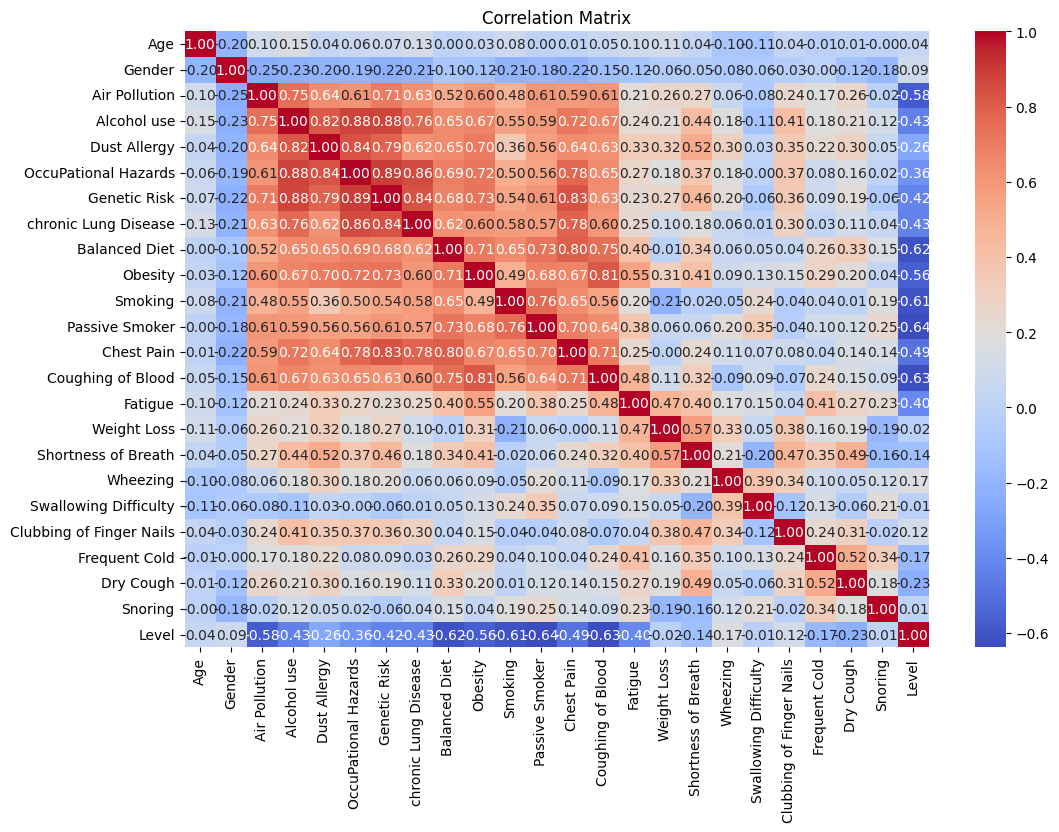

In [ ]:
# Plot a correlation matrix
numerical_features= dataset.select_dtypes(include=['int64','float64'])

correlation_matrix=numerical_features.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Total outliers removed : 10


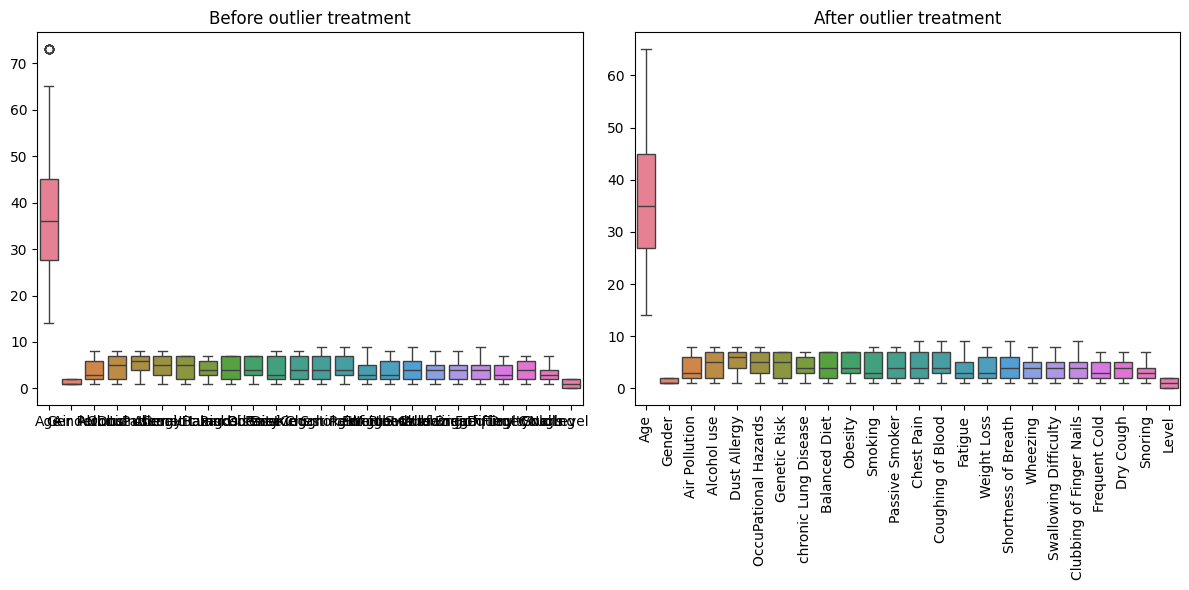

In [ ]:
# Removing Outliers using IQR method

numerical_features=dataset.select_dtypes(include=['int64','float64'])

Q1=numerical_features.quantile(0.25)
Q3=numerical_features.quantile(0.75)

Inter_Quartile_Range=Q3-Q1

# Define lower bounds and upper bounds
Lower_Bounds=Q1-1.5*Inter_Quartile_Range
Upper_Bounds=Q3+1.5*Inter_Quartile_Range

outliers=((numerical_features<Lower_Bounds)|(numerical_features>Upper_Bounds)).any(axis=1)

outliers_removed=outliers.sum()

# Filter without outliers
no_outliers=dataset[~outliers]

print('Total outliers removed :', outliers_removed)


def graph_before_after(before,after):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

  # Before removing outliers
  sns.boxplot(data=before,ax=axes[0])
  axes[0].set_title('Before outlier treatment')
  plt.xticks(rotation=90)

  # After removing outliers
  sns.boxplot(data=after,ax=axes[1])
  axes[1].set_title('After outlier treatment')
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

graph_before_after(dataset,no_outliers)


In [19]:
# Dropping the unnecessary form of data
dataset.drop('Patient Id',axis=1,inplace=True)
dataset

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [36]:
# Converting the catergorical value into numerical form

label=LabelEncoder()
label.fit(dataset['Level'])

LabelEncoder()

In [37]:
label.transform(dataset['Level'])

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [38]:
dataset['Level']=label.transform(dataset['Level'])

In [39]:
dataset.Level.value_counts()

,count
Level,
0,365
2,332
1,303


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Gender                    1000 non-null   float64
 2   Air Pollution             1000 non-null   float64
 3   Alcohol use               1000 non-null   float64
 4   Dust Allergy              1000 non-null   float64
 5   OccuPational Hazards      1000 non-null   float64
 6   Genetic Risk              1000 non-null   float64
 7   chronic Lung Disease      1000 non-null   float64
 8   Balanced Diet             1000 non-null   float64
 9   Obesity                   1000 non-null   float64
 10  Smoking                   1000 non-null   float64
 11  Passive Smoker            1000 non-null   float64
 12  Chest Pain                1000 non-null   float64
 13  Coughing of Blood         1000 non-null   float64
 14  Fatigue  

Dimensional Reduction

In [ ]:

pca=PCA(n_components=10)
pca.fit(dataset)

PCA(n_components=10)

In [ ]:
new_dataset=pca.transform(dataset)
new_dataset

array([[ -6.26636595,  -5.28694032,  -1.44864282, ...,  -0.98091217,
         -1.38595427,  -0.73328546],
       [-29.22412869,  -4.53998123,   2.27633004, ...,   5.93941072,
         -0.32630188,  -0.93523538],
       [ -2.54191567,   3.68155447,   5.92927657, ...,  -0.05552518,
          0.30231967,   0.58925633],
       ...,
       [-16.6527549 ,   4.2787622 ,   6.06924704, ...,  -0.21493012,
          0.37079323,   0.56713738],
       [-26.33953122,   9.37710879,  -5.3721173 , ...,  -0.60149398,
         -1.03922716,   1.38778192],
       [ 14.43716254,   3.40674931,   5.78818886, ...,   0.48233923,
         -0.56988114,   0.15187769]])

In [ ]:
new_dataset=pd.DataFrame(new_dataset)
new_dataset

,0,1,2,3,4,5,6,7,8,9
0,-6.266366,-5.286940,-1.448643,-0.379351,-1.297613,-1.621446,-0.017017,-0.980912,-1.385954,-0.733285
1,-29.224129,-4.539981,2.276330,1.262835,2.389689,0.388620,-1.914079,5.939411,-0.326302,-0.935235
2,-2.541916,3.681554,5.929277,2.298197,-6.910051,-1.401159,-0.239083,-0.055525,0.302320,0.589256
3,0.473267,8.448772,-2.874397,-0.330567,-2.212782,4.195883,1.659147,-0.874636,-2.065984,0.660369
4,13.149109,7.677500,-5.754613,-1.532108,-1.577972,-0.496077,0.328734,-0.169117,-1.205092,1.530800
...,...,...,...,...,...,...,...,...,...,...
995,10.033680,7.704117,-4.310448,3.343009,3.384833,0.570171,-0.881789,1.472609,-1.748358,-0.696791
996,0.644297,9.402731,-0.469175,1.500432,1.024107,-3.330648,0.460007,-2.521907,2.606939,-3.999308
997,-16.652755,4.278762,6.069247,2.104138,-7.081042,-1.521622,-0.020635,-0.214930,0.370793,0.567137
998,-26.339531,9.377109,-5.372117,-2.068453,-2.028147,-0.808527,0.959490,-0.601494,-1.039227,1.387782


In [ ]:
pca.explained_variance_ratio_

array([0.5937237 , 0.18055382, 0.0559896 , 0.03621783, 0.02851598,
       0.02130793, 0.01212215, 0.01117482, 0.0103817 , 0.00968533])

In [28]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,3.019807e-17,1.00050,-1.931249,-0.785367,-0.097838,0.652194,2.985627
Gender,1000.0,1.811884e-16,1.00050,-0.819903,-0.819903,-0.819903,1.219657,1.219657
Air Pollution,1000.0,4.973799e-17,1.00050,-1.399439,-0.906679,-0.413919,1.064362,2.049883
Alcohol use,1000.0,9.947598e-17,1.00050,-1.360357,-0.978556,0.166847,0.930449,1.312250
Dust Allergy,1000.0,1.776357e-17,1.00050,-2.103703,-0.588431,0.421751,0.926842,1.431932
OccuPational Hazards,1000.0,4.263256e-17,1.00050,-1.822712,-0.873383,0.075946,1.025275,1.499940
Genetic Risk,1000.0,-2.131628e-17,1.00050,-1.683965,-1.213584,0.197560,1.138323,1.138323
chronic Lung Disease,1000.0,6.217249e-17,1.00050,-1.829407,-0.746918,-0.205673,0.876816,1.418061
Balanced Diet,1000.0,1.740830e-16,1.00050,-1.635543,-1.167040,-0.230035,1.175473,1.175473
Obesity,1000.0,1.065814e-16,1.00050,-1.631465,-0.689782,-0.218941,1.193582,1.193582


Scaling of the data

In [30]:

scaler=StandardScaler()

for column in dataset.columns:
  dataset[[column]]=scaler.fit_transform(dataset[[column]])

dataset.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655,0.039558
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245,1.238293
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,-1.159177
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105,-1.159177
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,-1.159177


Train Test Analysis

In [41]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [64]:
def evaluate_model(actual,predicted):
  mse=mean_squared_error(actual,predicted),
  mae=mean_absolute_error(actual,predicted),
  r2=r2_score(actual,predicted)
  return mse,mae,r2

In [66]:
# Dictionary form
models={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'SVM':SVC(),
    'KNN':KNeighborsClassifier()
}


In [69]:
score_text=""
for i in range(len(models)):
            model = list(models.values())[i]
            model.fit(x_train,y_train)

            #Make prediction:
            y_train_pred = model.predict(x_train)
            y_test_pred = model.predict(x_test)

            score=model.score(x_test,y_test)

            #Evaluate Train and Test dataset :
            model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
            model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
            model_name = list(models.keys())[i]

            print(model_name)
            print('Model score',score)

            print("Model Performance for Training set :")

            print('Root Mean Squared Error :',model_train_rmse)
            print("Mean Absolute Error : ", model_train_mae)
            print("R2 Score : ", model_train_r2)

            print( )
            print("Model Performance for Testing set :")

            print('Root Mean Squared Error : ', model_test_rmse)
            print('Mean Absolute Error :  ',{model_test_mae})
            print('R2 Score : ', {model_test_r2})
            print("----------------------------------------------------")

Logistic Regression
Model score 1.0
Model Performance for Training set :
Root Mean Squared Error : (0.0,)
Mean Absolute Error :  (0.0,)
R2 Score :  1.0

Model Performance for Testing set :
Root Mean Squared Error :  (0.0,)
Mean Absolute Error :   {(0.0,)}
R2 Score :  {1.0}
----------------------------------------------------
Decision Tree
Model score 1.0
Model Performance for Training set :
Root Mean Squared Error : (0.0,)
Mean Absolute Error :  (0.0,)
R2 Score :  1.0

Model Performance for Testing set :
Root Mean Squared Error :  (0.0,)
Mean Absolute Error :   {(0.0,)}
R2 Score :  {1.0}
----------------------------------------------------
Random Forest
Model score 1.0
Model Performance for Training set :
Root Mean Squared Error : (0.0,)
Mean Absolute Error :  (0.0,)
R2 Score :  1.0

Model Performance for Testing set :
Root Mean Squared Error :  (0.0,)
Mean Absolute Error :   {(0.0,)}
R2 Score :  {1.0}
----------------------------------------------------
SVM
Model score 1.0
Model Perfo

HyperParameter Tuning

In [70]:
# Dictionary within a dictionary
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[10,20,30],
            'kernel':['rbf','linear']
        }
    },
    'Random_Forest':{
        'model':RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'Logistic_Regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    },
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[5,10,15]
        }
    }
}


In [71]:
scores=[]

for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
  clf.fit(x_train,y_train)

  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [72]:
scores=pd.DataFrame(scores,columns=['model','best_score','best_params'])
scores

,model,best_score,best_params
0,svm,1.00000,"{'C': 10, 'kernel': 'rbf'}"
1,Random_Forest,1.00000,{'n_estimators': 1}
2,Logistic_Regression,0.99875,{'C': 10}
3,Decision_Tree,1.00000,{'criterion': 'gini'}
4,KNN,1.00000,{'n_neighbors': 5}


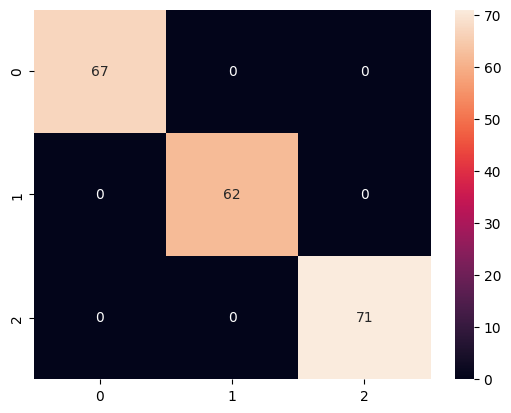

In [74]:
# Confusion matrix

cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [76]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [79]:
import joblib

In [81]:
save_model=joblib.dump(model,'model.pkl')
save_model

['model.pkl']